In [98]:
import os
from IPython.display import Image
from IPython.core.display import HTML 
import time
import ast

In [1]:
graphname = 'pratica1.graph'

In [81]:
graphs = [
    ['N1', 'C2'],
    ['N1', 'C6'],
    ['N1', 'C7'],
    ['C7', 'C8'],
    ['C8', 'C4'],
    ['C6', 'C5'],
    ['C5', 'C4'],
    ['C4', 'N3'],
    ['N3', 'C2'],
    ['N3', 'C12'],
    ['C2', 'C9'],
    ['C9', 'C10'],
    ['C9',  'O11'],
    ['0', '0'],
    ['NA', 'Cc'],
    ['NA', 'Cb'],
    ['NA', 'Cd'],
]
tag2num = {'0':'0'}
num2tag = {'0':'0'}
i = 1
for v1, v2 in graphs:
    if v1 == '0': continue
    if v1 not in tag2num.keys():
        num2tag[str(i)] = v1
        tag2num[v1] = str(i)
        i -=- 1
    if v2 not in tag2num.keys():
        num2tag[str(i)] = v2
        tag2num[v2] = str(i)
        i -=- 1
print(tag2num)
print(num2tag)

{'0': '0', 'N1': '1', 'C2': '2', 'C6': '3', 'C7': '4', 'C8': '5', 'C4': '6', 'C5': '7', 'N3': '8', 'C12': '9', 'C9': '10', 'C10': '11', 'O11': '12', 'NA': '13', 'Cc': '14', 'Cb': '15', 'Cd': '16'}
{'0': '0', '1': 'N1', '2': 'C2', '3': 'C6', '4': 'C7', '5': 'C8', '6': 'C4', '7': 'C5', '8': 'N3', '9': 'C12', '10': 'C9', '11': 'C10', '12': 'O11', '13': 'NA', '14': 'Cc', '15': 'Cb', '16': 'Cd'}


In [82]:
def graph2graphviz(graph):
    print ("digraph {")
    print ('\tsubgraph clusterG1 { graph [label="Compound C"]')
    for i, edge in enumerate(graphs):
        if edge == ['0', '0']: break
        print ("\t\t",  ""+str(edge[0]), "->", ""+str(edge[1]))
    print ("\t}")

    print ('\tsubgraph clusterG2 { graph [label="Fragment F"]')
    for i, edge in enumerate(graphs[i+1:]):
        print ("\t\t",  ""+str(edge[0]), "->", ""+str(edge[1]))
    print ("\t}")

    print ("}")

def graph2input(graphs):
    finalgraphfile = ''
    for e in graphs:
        print(e[0], e[1], '<->', tag2num[e[0]], tag2num[e[1]])
        finalgraphfile += tag2num[e[0]] + ' ' + tag2num[e[1]] + '\n'
    with open(f'{graphname}', 'w') as graphFile:
        graphFile.write(finalgraphfile)
    return finalgraphfile

In [83]:
graph = graph2input(graphs)

N1 C2 <-> 1 2
N1 C6 <-> 1 3
N1 C7 <-> 1 4
C7 C8 <-> 4 5
C8 C4 <-> 5 6
C6 C5 <-> 3 7
C5 C4 <-> 7 6
C4 N3 <-> 6 8
N3 C2 <-> 8 2
N3 C12 <-> 8 9
C2 C9 <-> 2 10
C9 C10 <-> 10 11
C9 O11 <-> 10 12
0 0 <-> 0 0
NA Cc <-> 13 14
NA Cb <-> 13 15
NA Cd <-> 13 16


In [84]:
graph2graphviz(graphs)

digraph {
	subgraph clusterG1 { graph [label="Compound C"]
		 N1 -> C2
		 N1 -> C6
		 N1 -> C7
		 C7 -> C8
		 C8 -> C4
		 C6 -> C5
		 C5 -> C4
		 C4 -> N3
		 N3 -> C2
		 N3 -> C12
		 C2 -> C9
		 C9 -> C10
		 C9 -> O11
	}
	subgraph clusterG2 { graph [label="Fragment F"]
		 NA -> Cc
		 NA -> Cb
		 NA -> Cd
	}
}


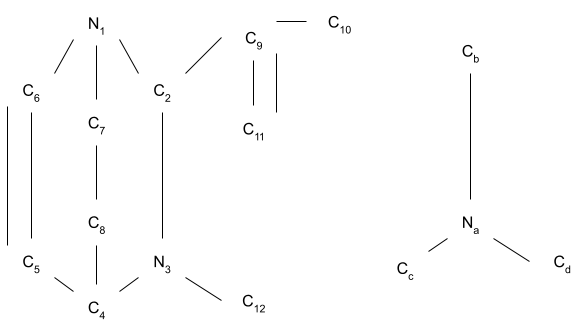

In [38]:
Image(filename= "pratica1.png",  width=700, height=700)

In [72]:
def entradaSat(graph):
    os.system(f'python3 src/gen_input.py {graph}')

In [87]:
entradaSat(graphname)

0.0015702247619628906


In [88]:
def satSolve(graphname):
    satin = graphname + '.satinput'
    satout = graphname + '.satoutput'
    os.system(f'./minisat_static {satin} {satout}')

In [89]:
begin = time.time()
satSolve(graphname)
end = time.time()

==================================[MINISAT]===================================
| Conflicts |     ORIGINAL     |              LEARNT              | Progress |
|           | Clauses Literals |   Limit Clauses Literals  Lit/Cl |          |
|         0 |      24      618 |       8       0        0    -nan |  0.000 % |
restarts              : 1
conflicts             : 0              (-nan /sec)
decisions             : 3              (inf /sec)
propagations          : 48             (inf /sec)
conflict literals     : 0              (-nan % deleted)
Memory used           : 2.24 MB
CPU time              : 0 s

SATISFIABLE


In [94]:
def saidaSat2Problem(graphname):
    satout = graphname + '.satoutput'
    mapping = graphname  + '.mapping'
    a = os.popen(f'python src/gen_output.py {satout} {mapping}').read()
    print(a)
    return a

In [101]:
mappingFunctionOld = ast.literal_eval(saidaSat2Problem(graphname).split('\n')[-2])
mappingFunction = {}
for k,v in mappingFunctionOld.items():
    mappingFunction[num2tag[k]] = num2tag[v]

G'-> g
13 -> 1

14 -> 2

15 -> 3

16 -> 4



{'13': '1', '14': '2', '15': '3', '16': '4'}



In [102]:
mappingFunction

{'NA': 'N1', 'Cc': 'C2', 'Cb': 'C6', 'Cd': 'C7'}

In [105]:
def printMappingFunctionGraph(mappingFunction):
  print ('\tsubgraph mapG1G2 { graph [label="m"]')
  for g2, g1 in mappingFunction.items():
    print ("\t\t",  ""+str(g2), "->", ""+str(g1), '[color = red]')
  print ("\t}")

In [106]:
printMappingFunctionGraph(mappingFunction)

	subgraph mapG1G2 { graph [label="m"]
		 NA -> N1 [color = red]
		 Cc -> C2 [color = red]
		 Cb -> C6 [color = red]
		 Cd -> C7 [color = red]
	}


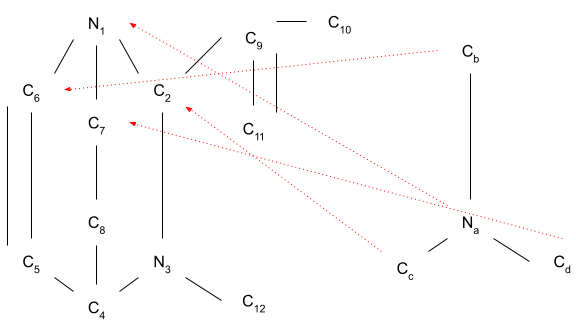

In [109]:
Image(filename= "pratica1_mapping.png",  width=700, height=700)

In [107]:
def checkSolution(graphname):
    mapping = graphname  + '.mapping'
    os.system(f'python src/check.py {graphname} {mapping}')

In [108]:
checkSolution(graphname)

True
